In [2]:
import matplotlib.pyplot as plt
import mplhep
# plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc
from scipy.interpolate import interp1d

# Angular Resoultion of Detector

In [3]:
res_angles = np.array([270, 240, 220, 200, 190, 180, 170, 160, 140, 120, 90, 150, 210])
res_counts = np.array([238, 225, 577, 2200, 3168, 3867, 3702, 2900, 969, 246, 244, 1881, 1256])

sort_indices = np.argsort(res_angles)

res_angles = res_angles[sort_indices]
res_counts = res_counts[sort_indices]


res_rate = res_counts / 100
u_res_rate = np.sqrt(res_counts) / 100

[-3.42078344 21.26971654 37.59693619  1.31053828]
[0.17766811 0.26155644 0.36989768 0.21967493]
chi_sqrd/dof: 0.38809704081870045


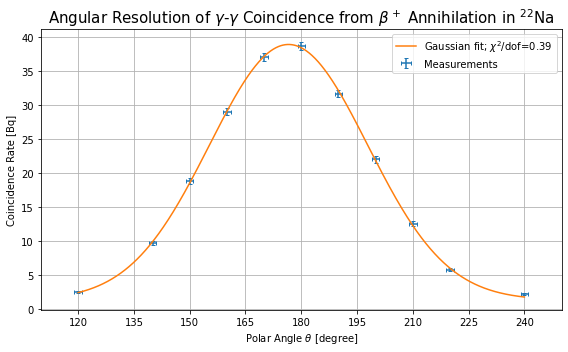

In [4]:
a, b = 1, -2

def gauss(x, offset, std, a, c):
    return a * np.exp(-(180 + offset - x)**2/2/std**2) + c


res_coeffs, res_cov = sc.curve_fit(gauss,
                                   res_angles[a:b], res_rate[a:b],
                                   sigma=u_res_rate[a:b], absolute_sigma=True,
                                   p0=(0, 30, 40, 3))

chi_sqrd_gauss = np.sum(((res_rate[a:b]-gauss(res_angles[a:b], *res_coeffs))/u_res_rate[a:b])**2)


print(res_coeffs)
print(np.sqrt(np.diagonal(res_cov)))
print('chi_sqrd/dof:', chi_sqrd_gauss/(len(res_angles)-4))


fig, ax = plt.subplots(figsize=(8,5))

ax.errorbar(res_angles, res_rate,
            xerr=1, yerr=u_res_rate,
            fmt='none', capsize=2,
            label='Measurements'
           )

angles = np.linspace(res_angles[a], res_angles[b], 1001)
ax.plot(angles, gauss(angles, *res_coeffs), c='C1', label='Gaussian fit; $\chi^2/$dof={:3.2f}'.format(chi_sqrd_gauss/(len(res_angles)-4)))
ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
ax.set_ylabel('Coincidence Rate [Bq]')
ax.set_xticks(np.arange(120,241,15))
ax.set_xlim((110, 250))
ax.grid()
ax.legend()

ax.set_title(r'Angular Resolution of $\gamma$-$\gamma$ Coincidence from $\beta^+$ Annihilation in ${}^{22}\mathrm{Na}$', size=15)

plt.tight_layout()
# plt.savefig('Figures/correlation/angular_resolution.pdf', dpi=600)
plt.show()

# Angular Correlation Fits

In [5]:
E = np.array([1.5, 1, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.03, 0.02])

E1 = 0.511
E2 = 0.623

Q2_5_data = np.array([0.9057, 0.9046, 0.9016, 0.8981, 0.8879, 0.8727, 0.8505, 0.8444, 0.8455, 0.8439])
Q4_5_data = np.array([0.7114, 0.7086, 0.7001, 0.6901, 0.6612, 0.6188, 0.5593, 0.5436, 0.5463, 0.5424])

Q2_5 = interp1d(E, Q2_5_data, kind='cubic')
Q4_5 = interp1d(E, Q4_5_data, kind='cubic')

print(Q2_5(0.511), Q2_5(0.623))
print(Q4_5(0.511), Q4_5(0.623))

0.8983280770478672 0.9004106483768384
0.6907519740931839 0.6967044318279966


In [6]:
Q2_7_data = np.array([0.9440, 0.9441, 0.9422, 0.9403, 0.9345, 0.9265, 0.9153, 0.9124, 0.9129, 0.9122])
Q4_7_data = np.array([0.8222, 0.8225, 0.8167, 0.8109, 0.7932, 0.7694, 0.7363, 0.7278, 0.7293, 0.7272])

Q2_7 = interp1d(E, Q2_7_data, kind='cubic')
Q4_7 = interp1d(E, Q4_7_data, kind='cubic')

print(Q2_7(0.511), Q2_7(0.623))
print(Q4_7(0.511), Q4_7(0.623))

0.9404346450953788 0.9415750004683853
0.8113198043576024 0.8148168496608522


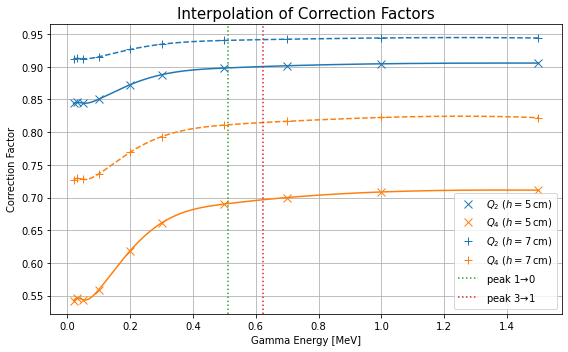

In [7]:
E_axis = np.linspace(0.02, 1.5, 1001)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(E, Q2_5_data, label='$Q_2$ ($h=5\,$cm)', marker='x', ms=8, lw=0, c='C0')
ax.plot(E, Q4_5_data, label='$Q_4$ ($h=5\,$cm)', marker='x', ms=8, lw=0, c='C1')

ax.plot(E, Q2_7_data, label='$Q_2$ ($h=7\,$cm)', marker='+', ms=8, lw=0, c='C0')
ax.plot(E, Q4_7_data, label='$Q_4$ ($h=7\,$cm)', marker='+', ms=8, lw=0, c='C1')

ax.plot(E_axis, Q2_5(E_axis), c='C0')
ax.plot(E_axis, Q4_5(E_axis), c='C1')

ax.plot(E_axis, Q2_7(E_axis), c='C0', ls='--')
ax.plot(E_axis, Q4_7(E_axis), c='C1', ls='--')

ax.axvline(x=0.511, label=r'peak $1\to 0$', ls=':', color='C2')
ax.axvline(x=0.623, label=r'peak $3\to 1$', ls=':', color='C3')

ax.legend()
ax.set_xlabel(r'Gamma Energy [MeV]')
ax.set_ylabel('Correction Factor')
ax.grid()
ax.legend()

ax.set_title(r'Interpolation of Correction Factors', size=15)

plt.tight_layout()
# plt.savefig('Figures/correlation/correction_factor_interpolation.pdf', dpi=600)
plt.show()

## Direct fit

In [8]:
# import data
df = pd.read_csv('correlation.csv')

In [1]:
df['errors']/df['rates']

NameError: name 'df' is not defined

In [9]:
# correction factors
Q2_sqrd = Q2_5(E1)*Q2_5(E2)
Q4_sqrd = Q4_5(E1)*Q4_5(E2)

print(Q2_sqrd, Q4_sqrd)

# define fit function
def correlation_correct(theta, N_theo, a2_theo, a4_theo):

    # transform to Legendre coefficients
    A0_theo = N_theo * (1 + a2_theo/3 + a4_theo/5)
    A2_theo = N_theo * 2/21 * (7*a2_theo + 6*a4_theo)
    A4_theo = N_theo * 8/35 * a4_theo

    # apply correction factors
    A0_exp = A0_theo
    A2_exp = A2_theo * Q2_sqrd
    A4_exp = A4_theo * Q4_sqrd

    # transform back to power coefficients
    N_exp = A0_exp - 1/2 * A2_exp + 3/8 * A4_exp
    a2_exp = 1/N_exp * 3/2 * (A2_exp - 10/4 * A4_exp)
    a4_exp = 1/N_exp * 35/8 * A4_exp
    
    # corret for the angle offset determied below
    theta0 = 0

    # tranform theta from degree to radian
    theta = theta * np.pi / 180
    theta0 = theta0 * np.pi / 180

    return N_exp * (1 + a2_exp * np.cos(theta-theta0)**2 + a4_exp * np.cos(theta-theta0)**4)


coeffs, cov = sc.curve_fit(correlation_correct,
                           df['angle'], df['rate'],
                           sigma=df['error'], absolute_sigma=True)

u_coeffs = np.sqrt(np.diagonal(cov))

chi_sqrd_fit = np.sum(((df['rate']-correlation_correct(df['angle'], *coeffs))/df['error'])**2)

print(coeffs)
print(u_coeffs)
print('chi_sqrd/dof:', chi_sqrd_fit/(len(df['rate'])-3))

0.8088641663097885 0.4812499616446587
[ 0.31612916 -1.58884547  1.97466243]
[0.00806727 0.15104798 0.15964188]
chi_sqrd/dof: 0.7277219125566083


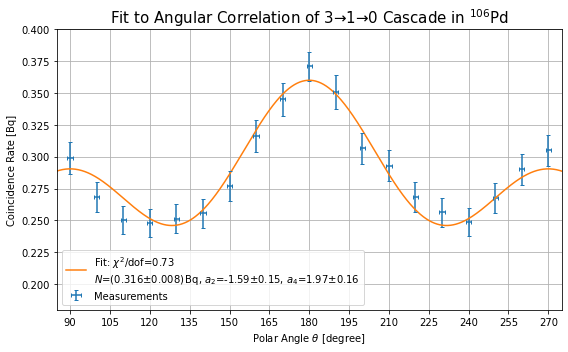

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

angles = np.linspace(80, 280, 1001)
ax.plot(angles, correlation_correct(angles, *coeffs), c='C1',
        label='Fit: $\chi^2/$dof={6:3.2f}\n$N$=({0:4.3f}$\pm${3:4.3f})$\,$Bq, $a_2$={1:3.2f}$\pm${4:3.2f}, $a_4$={2:3.2f}$\pm${5:3.2f}'.format(
        *coeffs, *u_coeffs,
        chi_sqrd_fit/(len(df['rate'])-3)))

ax.errorbar(df['angle'], df['rate'],
            xerr=1, yerr=df['error'],
            fmt='none', capsize=2,
            label='Measurements'
           )

ax.legend()
ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
ax.set_ylabel('Coincidence Rate [Bq]')
ax.set_xticks(np.arange(90,271,15))
ax.set_xlim((85, 275))
ax.set_ylim((0.18, 0.4))
ax.grid()
ax.legend(loc='lower left')

ax.set_title(r'Fit to Angular Correlation of $3\to1\to0$ Cascade in ${}^{106}$Pd', size=15)

plt.tight_layout()
# plt.savefig('Figures/correlation/correlation_direct_fit.pdf', dpi=600)
plt.show()

## Theoretical Comparison

In [11]:
theo_coeff = [[1,0],
              [-1/3,0],
              [-1/3,0],
              [-1/3,0],
              [-3/29, 0],
              [-3,4],
              [-1/3,0],
              [3/7,0],
              [-15/13, 16/13],
              [-3/29, 0],
              [1/8, 1/24]]


theo_casc = ['0(1)1(1)0', '1(1)1(1)0', '1(2)1(1)0', '2(1)1(1)0', '3(2)1(1)0', '0(2)2(2)0', '1(1)2(2)0', '2(1)2(2)0', '2(2)2(2)0', '3(1)2(2)0', '4(2)2(2)0']

In [19]:
def chisq(N, a2_theo, a4_theo):
    y_model = correlation_correct(df['angle'], N, a2_theo, a4_theo)
    return np.sum((df['rate'] - y_model)**2 / df['error']**2)


N = np.zeros(11)
u_N = np.zeros(11)
chi_sqrd_dof = np.zeros(11)


for i in range(11):
    def correlation_theo_fit(theta, N):
        return correlation_correct(theta, N, *theo_coeff[i])
    
    N[i], cov_N = sc.curve_fit(correlation_theo_fit,
                               df['angle'], df['rate'],
                               sigma=df['error'], absolute_sigma=True)
    u_N[i] = np.sqrt(cov_N)
    
    chi_sqrd_dof[i] = chisq(N[i], *theo_coeff[i])/(len(df['rate'])-3)
    print(theo_casc[i], '&', theo_coeff[i][0], '&', theo_coeff[i][1], '&', chi_sqrd_dof[i].round(2), '\\\\')

0(1)1(1)0 & 1 & 0 & 17.07 \\
1(1)1(1)0 & -0.3333333333333333 & 0 & 31.4 \\
1(2)1(1)0 & -0.3333333333333333 & 0 & 31.4 \\
2(1)1(1)0 & -0.3333333333333333 & 0 & 31.4 \\
3(2)1(1)0 & -0.10344827586206896 & 0 & 15.11 \\
0(2)2(2)0 & -3 & 4 & 21.19 \\
1(1)2(2)0 & -0.3333333333333333 & 0 & 31.4 \\
2(1)2(2)0 & 0.42857142857142855 & 0 & 7.52 \\


2(2)2(2)0 & -1.1538461538461537 & 1.2307692307692308 & 6.06 \\
3(1)2(2)0 & -0.10344827586206896 & 0 & 15.11 \\
4(2)2(2)0 & 0.125 & 0.041666666666666664 & 7.57 \\


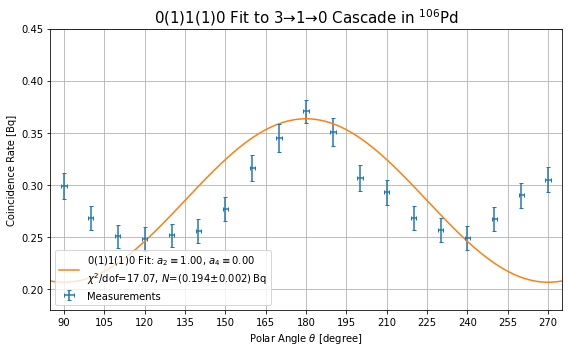

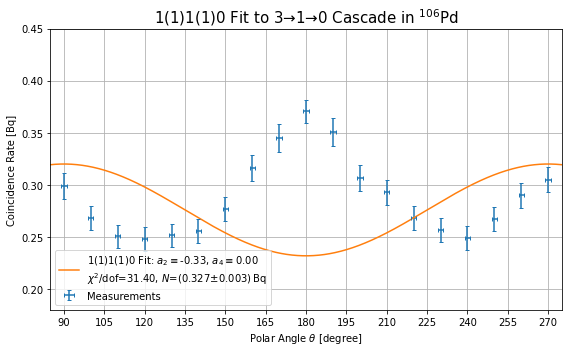

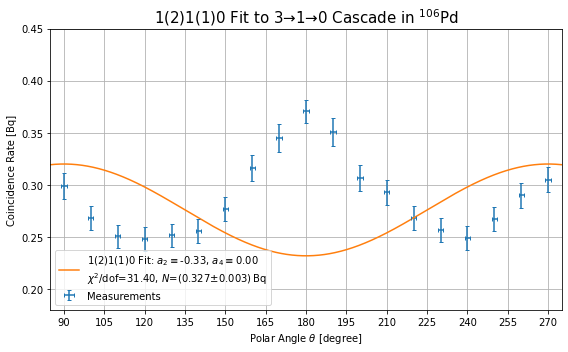

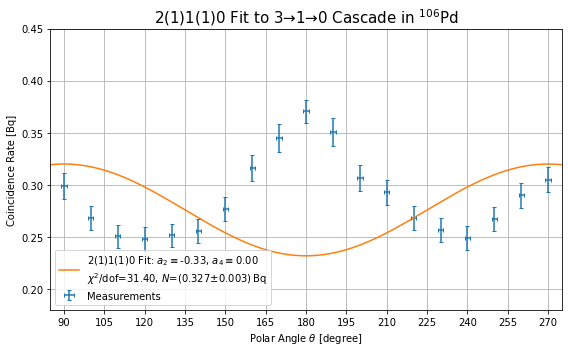

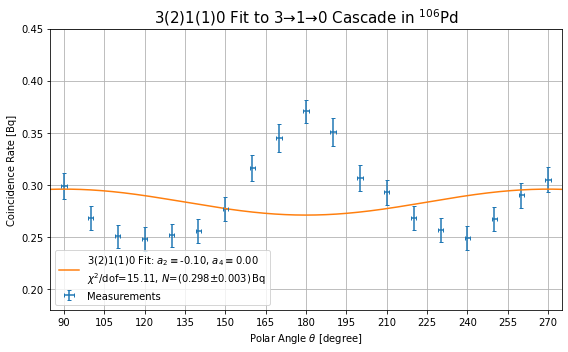

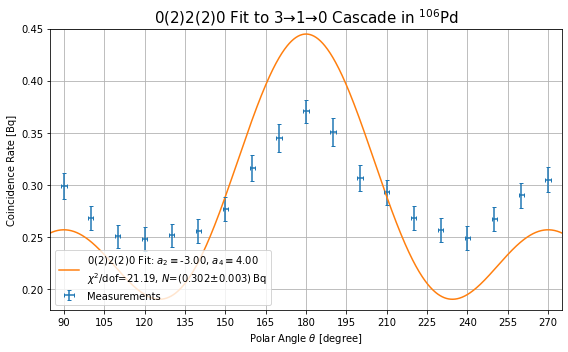

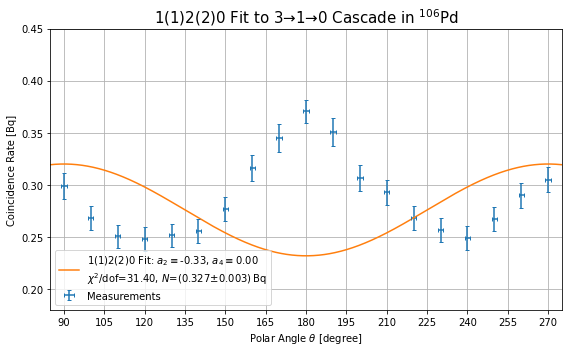

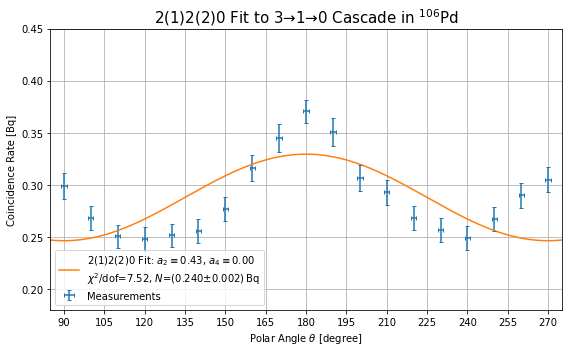

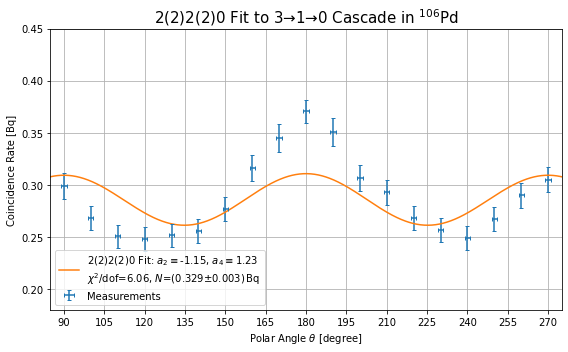

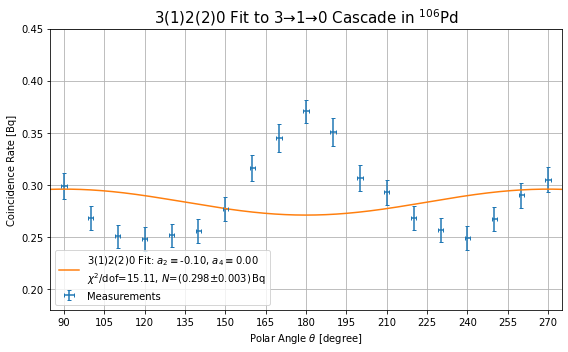

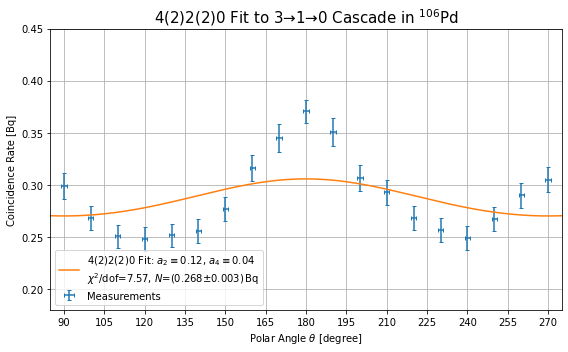

In [13]:
for i in range(11):
    
    def correlation_theo_fit(theta, N):
        return correlation_correct(theta, N, *theo_coeff[i])
    
    fig, ax = plt.subplots(figsize=(8,5))

    angles = np.linspace(80, 280, 1001)
    ax.plot(angles, correlation_theo_fit(angles, N[i]), c='C1',
            label=theo_casc[i]+' Fit: $a_2\equiv${0:3.2f}, $a_4\equiv${1:3.2f}\n$\chi^2/$dof={4:3.2f}, $N$=({2:4.3f}$\pm${3:4.3f})$\,$Bq'.format(
            *theo_coeff[i], N[i], u_N[i], chi_sqrd_dof[i]))

    ax.errorbar(df['angle'], df['rate'],
                xerr=1, yerr=df['error'],
                fmt='none', capsize=2,
                label='Measurements'
               )

    ax.legend()
    ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
    ax.set_ylabel('Coincidence Rate [Bq]')
    ax.set_xticks(np.arange(90,271,15))
    ax.set_xlim((85, 275))
    ax.set_ylim((0.18, 0.45))
    ax.grid()
    ax.legend(loc='lower left')

    ax.set_title(theo_casc[i]+r' Fit to $3\to1\to0$ Cascade in ${}^{106}$Pd', size=15)

    plt.tight_layout()
    # plt.savefig('Figures/correlation/correlation_'+theo_casc[i]+'_fit.pdf', dpi=600)
    plt.show()

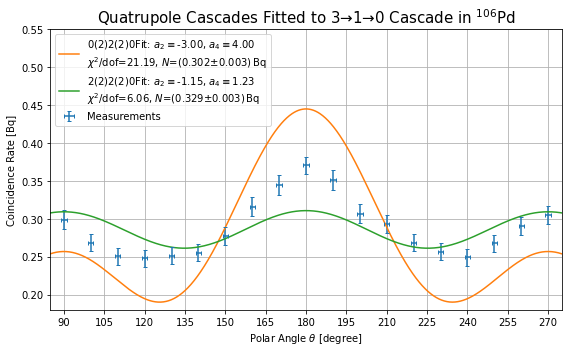

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

angles = np.linspace(80, 280, 1001)

j = 1

for i in [5, 8]:
    
    def correlation_theo_fit(theta, N):
        return correlation_correct(theta, N, *theo_coeff[i])
    
    ax.plot(angles, correlation_theo_fit(angles, N[i]), c='C'+str(j),
            label=theo_casc[i]+'Fit: $a_2\equiv${0:3.2f}, $a_4\equiv${1:3.2f}\n$\chi^2/$dof={4:3.2f}, $N$=({2:4.3f}$\pm${3:4.3f})$\,$Bq'.format(
            *theo_coeff[i], N[i], u_N[i], chisq(N[i], *theo_coeff[i])/(len(df['rate'])-3)))
    j += 1

ax.errorbar(df['angle'], df['rate'],
                xerr=1, yerr=df['error'],
                fmt='none', capsize=2,
                label='Measurements'
               )

ax.legend()
ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
ax.set_ylabel('Coincidence Rate [Bq]')
ax.set_xticks(np.arange(90,271,15))
ax.set_xlim((85, 275))
ax.set_ylim((0.18, 0.55))
ax.grid()
ax.legend(loc='upper left')

ax.set_title(r'Quatrupole Cascades Fitted to $3\to1\to0$ Cascade in ${}^{106}$Pd', size=15)

plt.tight_layout()
#plt.savefig('Figures/correlation/correlation_quadrupole_fit.pdf', dpi=600)
plt.show()

[0.10397312 0.18775047] [0.01840729 0.02525203]


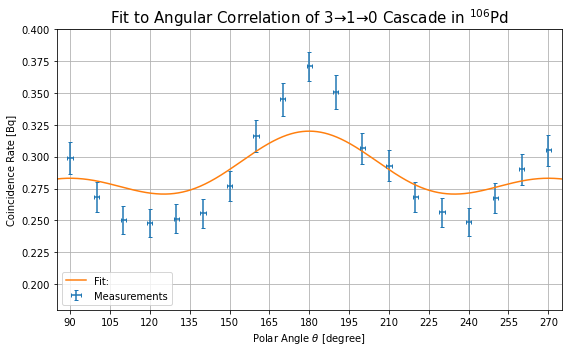

In [15]:
def linear_comb(theta, N1, N2):
    return correlation_correct(theta, N1, *theo_coeff[7]) + correlation_correct(theta, N2, *theo_coeff[8])

comb_coeffs, comb_cov = sc.curve_fit(linear_comb,
                           df['angle'], df['rate'],
                           sigma=df['error'], absolute_sigma=True)
u_comb = np.sqrt(np.diagonal(comb_cov))

print(comb_coeffs, u_comb)

fig, ax = plt.subplots(figsize=(8,5))

angles = np.linspace(80, 280, 1001)

ax.plot(angles, linear_comb(angles, *comb_coeffs), c='C1',
        label='Fit: ')

ax.errorbar(df['angle'], df['rate'],
            xerr=1, yerr=df['error'],
            fmt='none', capsize=2,
            label='Measurements'
           )

ax.legend()
ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
ax.set_ylabel('Coincidence Rate [Bq]')
ax.set_xticks(np.arange(90,271,15))
ax.set_xlim((85, 275))
ax.set_ylim((0.18, 0.4))
ax.grid()
ax.legend(loc='lower left')

ax.set_title(r'Fit to Angular Correlation of $3\to1\to0$ Cascade in ${}^{106}$Pd', size=15)

plt.tight_layout()
# plt.savefig('Figures/correlation/correlation_direct_fit.pdf', dpi=600)
plt.show()

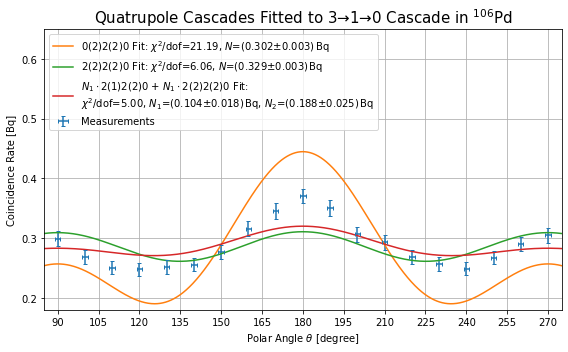

In [16]:
fig, ax = plt.subplots(figsize=(8,5))

angles = np.linspace(80, 280, 1001)
j=1
for i in [5, 8]:
    
    def correlation_theo_fit(theta, N):
        return correlation_correct(theta, N, *theo_coeff[i])
    
    ax.plot(angles, correlation_theo_fit(angles, N[i]), c='C'+str(j),
            label=theo_casc[i]+' Fit: $\chi^2/$dof={2:3.2f}, $N$=({0:4.3f}$\pm${1:4.3f})$\,$Bq'.format(
            N[i], u_N[i], chisq(N[i], *theo_coeff[i])/(len(df['rate'])-3)))
    j += 1
    
ax.plot(angles, linear_comb(angles, *comb_coeffs), c='C3',
        label='$N_1\cdot$'+theo_casc[7]+' + $N_1\cdot$'+theo_casc[8]+' Fit:\n'+r'$\chi^2/$dof={0:3.2f}, $N_1$=({1:4.3f}$\pm${3:4.3f})$\,$Bq, $N_2$=({2:4.3f}$\pm${4:4.3f})$\,$Bq'.format(
        np.sum(((df['rate']-linear_comb(df['angle'], *comb_coeffs))/df['error'])**2)/(len(df['angle'])-6),
        *comb_coeffs, *u_comb
        ))

ax.errorbar(df['angle'], df['rate'],
                xerr=1, yerr=df['error'],
                fmt='none', capsize=2,
                label='Measurements'
               )

ax.legend()
ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
ax.set_ylabel('Coincidence Rate [Bq]')
ax.set_xticks(np.arange(90,271,15))
ax.set_xlim((85, 275))
ax.set_ylim((0.18, 0.65))
ax.grid()
ax.legend(loc='upper left')

ax.set_title(r'Quatrupole Cascades Fitted to $3\to1\to0$ Cascade in ${}^{106}$Pd', size=15)

plt.tight_layout()
plt.savefig('Figures/correlation/correlation_quadrupole_fit.pdf', dpi=600)
plt.show()

In [17]:
def test(theta, N, a2, a4, a6):
    theta = theta*np.pi/180
    return N * (1 + a2 * np.cos(theta)**2 + a4 * np.cos(theta)**4 + a6 * np.cos(theta)**6)


test_coeffs, test_cov = sc.curve_fit(test,
                           df['angle'], df['rate'],
                           sigma=df['error'], absolute_sigma=True)

u_test_coeffs = np.sqrt(np.diagonal(test_cov))

print(test_coeffs, u_test_coeffs)

[ 0.29090245 -0.8252443   1.1188652  -0.05835173] [0.00636579 0.23039512 0.60138933 0.41005857]


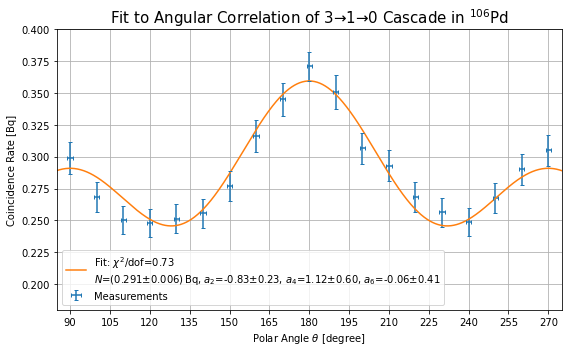

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

angles = np.linspace(80, 280, 1001)
ax.plot(angles, test(angles, *test_coeffs), c='C1',
        label='Fit: $\chi^2/$dof={8:3.2f}\n$N$=({0:4.3f}$\pm${4:4.3f})$\,$Bq, $a_2$={1:3.2f}$\pm${5:3.2f}, $a_4$={2:3.2f}$\pm${6:3.2f}, $a_6$={3:3.2f}$\pm${7:3.2f}'.format(
        *test_coeffs, *u_test_coeffs,
        chi_sqrd_fit/(len(df['rate'])-3)))

ax.errorbar(df['angle'], df['rate'],
            xerr=1, yerr=df['error'],
            fmt='none', capsize=2,
            label='Measurements'
           )

ax.legend()
ax.set_xlabel(r'Polar Angle $\theta$ [degree]')
ax.set_ylabel('Coincidence Rate [Bq]')
ax.set_xticks(np.arange(90,271,15))
ax.set_xlim((85, 275))
ax.set_ylim((0.18, 0.4))
ax.grid()
ax.legend(loc='lower left')

ax.set_title(r'Fit to Angular Correlation of $3\to1\to0$ Cascade in ${}^{106}$Pd', size=15)

plt.tight_layout()
# plt.savefig('Figures/correlation/correlation_direct_fit.pdf', dpi=600)
plt.show()